## NumPy and Pandas for 2D Data
### Two-Dimensional NumPy Arrays
* Python: List of lists
* NumPy: 2D array
* Pandas: DataFrame

2D arrays, as opposed to array of arrays:
* More memory efficient
* Accessing element is different
    * a[1,3] rather than a[1][3] (array of arrays)
* mean(), std(), etc operate on entire array

In [4]:
import numpy as np
import pandas as pd

In [5]:
'''
Find the station with the maximum riders on the first day, 
then return the mean riders per day for that station. 
Also return the mean ridership overall for comparsion.
'''

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def mean_riders_for_max_station(ridership):
    max_first_day = ridership[0,:].argmax()
    mean_for_max = ridership[:,max_first_day].mean()
    overall_mean = ridership.mean()
    return (mean_for_max, overall_mean)
    
mean_riders_for_max_station(ridership)    

(3239.9000000000001, 2342.5999999999999)

### NumPy Axis
axis = 0 is by column, axis = 1 is by row.
Find the mean ridership per day for each subway station.
Return the max and min ridership per day.

In [6]:
'''
First, for each subway station, calculate the mean ridership per day. 
Then, out of all the subway stations, return the maximum and minimum of
these values. That is, find the maximum mean-ridership-per-day and
the minimum mean-ridership-per-day for any subway station.
'''


def min_and_max_riders_per_day(ridership):
    ridership_per_day = ridership.mean(axis=0)
    max_daily_ridership = ridership_per_day.max()     
    min_daily_ridership = ridership_per_day.min()
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

### NumPy and Pandas Data Types
As for NumPy 2D data, math operators (mean(),std(), etc) cannot be used when the data does not only consists of number/int. 
Pandas DataFrame would be benefitial over NumPy 2D arrays to use math operators. Below shows how to create DataFrame.

In [7]:
enrollments_df = pd.DataFrame({
        "account_key":[448, 448, 448, 448, 448],
        "status": ["canceled", "canceled", "canceled", "canceled", "current"],
        "join_date": ["2014-11-10", "2014-11-05", "2015-01-27", "2014-11-10","2015-03-10"],
        "days_to_cancel": [65,5,0,0,np.nan],
        "is_udacity": [True,True,True,True,True]
    })

enrollments_df

,account_key,days_to_cancel,is_udacity,join_date,status
0,448,65.0,True,2014-11-10,canceled
1,448,5.0,True,2014-11-05,canceled
2,448,0.0,True,2015-01-27,canceled
3,448,0.0,True,2014-11-10,canceled
4,448,NaN,True,2015-03-10,current


In [8]:
enrollments_df.mean()

account_key       448.0
days_to_cancel     17.5
is_udacity          1.0
dtype: float64

### Accessing Elements of a DataFrame

In [9]:
'''
With Pandas DataFrame input, find the station with the maximum riders 
on the first day, then return the mean riders per day for that station.
Also return the mean ridership overall for comparsion.

'''

ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

def mean_riders_for_max_station(ridership):
    max_first_day = ridership_df.iloc[0].argmax()
    mean_for_max =  ridership_df[max_first_day].mean()
    overall_mean = ridership_df.values.mean()
    return (mean_for_max, overall_mean)

mean_riders_for_max_station(ridership)

(3239.9, 2342.5999999999999)

### Loading Data into a DataFrame
DataFrames are a great data structure to represent CSVs as CSV is two dimensional data structure with different data types for each column. Below shows how to load CSV files.

In [11]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

# Print out only first five rows
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [12]:
# Basic statistics of each column
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


### Calculating Correlation (Pearson's r)
Pearson's r:
* Ranges from -1 to 1
* First standardize each variable
* Multiply each pair of values, and take the average

r = average of (x in std units) * (y in std units)


In [13]:
'''
Compute the correlation between the two input variables. 
Each input is either a NumPy array or a Pandas Series.
    
correlation = average of (x in standard units) times (y in standard units)
    
Remember to pass the argument "ddof=0" to the Pandas std() function!
'''

def correlation(x, y):
    x_stdv = (x - x.mean())/x.std(ddof = 0)
    y_stdv = (y-y.mean())/y.std(ddof = 0)
    return (x_stdv*y_stdv).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']


print "Correlation between Number of Entries and Rain:", correlation(entries, rain)
print "Correlation between Number of Entries and Temperature:", correlation(entries, temp)
print "Correlation between Rain and Temperature:", correlation(rain, temp)

print "Correlation between Number of Entries and Cummulative Entries:", correlation(entries, cum_entries)

Correlation between Number of Entries and Rain: 0.0356485157722
Correlation between Number of Entries and Temperature: -0.0266933483216
Correlation between Rain and Temperature: -0.229034323408
Correlation between Number of Entries and Cummulative Entries: 0.585895470766


### Pandas Axis Names
Pandas DataFrame takes axis = 'index' or axis = 'columns.'
Note that df.mean(axis = 'index') taking mean along the index, or mean of each column. df.mean(axis = 'column') returning mean along the columns, or mean of each row.


### DataFrame Vectorized Operations
* Similar to vectorized operations for 2D NumPy arrays.
* Match up element by index and column name rather than position

In [14]:
'''
Take a DataFrame with cumulative entries and exits 
(entries in the first column, exits in the second)
and return a DataFrame with hourly entries and exits 
(entries in thefirst column, exits in the second).
'''


entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})



def get_hourly_entries_and_exits(entries_and_exits):
    shifted_entries_and_exits = entries_and_exits.shift(axis = 0)
    hourly_entries_and_exits = entries_and_exits.sub(shifted_entries_and_exits)
    return hourly_entries_and_exits
    
    
get_hourly_entries_and_exits(entries_and_exits)


,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [15]:
# Different apporach for the previous exercise

def get_hourly_entries_and_exits(entries_and_exits):
    
    return entries_and_exits.diff()

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


### DataFrame applymap()
applymap() applies a function to a DataFrame for each series in the DataFrame while apply() only applies function along input axis of DataFrame

In [16]:
'''
Convert the given DataFrame of numerical grades to letter grades. 
Return a new DataFrame with the converted grade.
    
The conversion rule is:
    90-100 -> A
    80-89  -> B
    70-79  -> C
    60-69  -> D
    0-59   -> F
'''

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
  
def convert_grade(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'
    

    
def convert_grades(grades):
    return grades.applymap(convert_grade)

convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


### DataFrame apply()

In [17]:
'''
Standardize each column of the given DataFrame. To standardize
a variable, convert each value to the number of standard 
deviations it is above or below the mean.
'''

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def std(data):
    mean = data.mean()
    std = data.std(ddof=0)
    return (data-mean)/std

def standardize(df):

    return df.apply(std)

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


### DataFrame apply()- Use Case 2

In [18]:
'''
Return the second-largest value of each 
column of the input DataFrame.
'''

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def second_largest_column(data):
    new_data = data.sort_values(ascending = False)
    return new_data.iloc[1]

def second_large(df):
    return df.apply(second_largest_column)

second_large(df)

a     4
b    40
c    20
dtype: int64

In [19]:
# Alternative answers
def second_largest_column(data):
    new_data = data.nlargest(2)
    return new_data.iloc[1]

def second_large(df):
    return df.apply(second_largest_column)

second_large(df)

a     4
b    40
c    20
dtype: int64

### Adding a DataFrame to a Series

In [20]:
# Adding a Series to a square DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
print "Adding a Series to a square DataFrame\n" ,df + s

# Adding a Series to a one-row DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
print "\nAdding a Series to a one-row DataFrame\n" ,df + s

# Adding a Series to a one-column DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})
print "\nAdding a Series to a one-column DataFrame\n" ,df + s

# Adding a Series to a one-column DataFrame Using add()
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})
print "\nAdding a Series to a one-column DataFrame using add funtion\n" ,df.add(s, axis = 'index')

# Adding when DataFrame column names match Series index
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })

print "\nAdding when DataFrame column names match Series index\n" ,df + s

# Adding when DataFrame column names don't match Series index
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
print "\nAdding when DataFrame column names don't match Series index\n" ,df + s

Adding a Series to a square DataFrame
    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164

Adding a Series to a one-row DataFrame
    0   1   2   3
0  11  22  33  44

Adding a Series to a one-column DataFrame
    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN

Adding a Series to a one-column DataFrame using add funtion
    0
0  11
1  22
2  33
3  44

Adding when DataFrame column names match Series index
    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164

Adding when DataFrame column names don't match Series index
    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### Standardizing Each Column Again

In [21]:
'''
Use vectorized operations instead of apply() to standardize 
each column of the given DataFrame. To standardize a variable, 
convert each value to the number of standard deviations it is
above or below the mean.

You should get the same results as you did before.
'''

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    mean_column = df.mean(axis = 0)
    std_column = df.std(axis = 0, ddof = 0)
    mean_diff = df.sub(mean_column, axis = 'columns')
    return mean_diff.div(std_column, axis = 'columns')

def standardize_rows(df):
    mean_row = df.mean(axis = 1)
    std_row = df.std(axis = 1, ddof = 0)
    mean_diff = df.sub(mean_row, axis = 'index')
    return mean_diff.div(std_row, axis = 'index')


print standardize(grades_df)
print standardize_rows(grades_df)

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400
         exam1  exam2
Andre      1.0   -1.0
Barry      1.0   -1.0
Chris      1.0   -1.0
Dan        1.0   -1.0
Emilio     1.0   -1.0
Fred       1.0   -1.0
Greta      1.0   -1.0
Humbert    1.0   -1.0
Ivan       1.0   -1.0
James      1.0   -1.0


### Calculating Hourly Entries and Exits Using groupby()

In [22]:
'''
Take a DataFrame with cumulative entries and exits and return 
a DataFrame with hourly entries and exits. The hourly entries 
and exits should be calculated separately for each station (the 'UNIT' column).
    
Hint: Use the `get_hourly_entries_and_exits()` function you wrote
in a previous quiz, DataFrame Vectorized Operations, and the `.apply()`
function, to help solve this problem.
'''
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def hourly_for_group(data):
    return data - data.shift(1)

def get_hourly_entries_and_exits(entries_and_exits):
    entries_and_exits_by_station = entries_and_exits.groupby('UNIT')
    return entries_and_exits_by_station[['ENTRIESn','EXITSn']].apply(hourly_for_group)
    
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


### Combining Pandas DataFrame

In [23]:
'''
Take 2 DataFrames, one with subway data and one with weather data, and return 
a single dataframe with one row for each date, hour, and location. Only include
times and locations that have both subway data and weather data available.
'''
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})


def combine_dfs(subway_df, weather_df):
    return subway_df.merge(weather_df, on = ['DATEn' , 'hour', 'latitude', 'longitude'], how = 'inner')

combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


### Plotting for DataFrames

In [24]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [25]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [26]:
subway_df_by_week=subway_df.groupby('day_week')
ridership_by_day = subway_df_by_week.mean()['ENTRIESn_hourly']

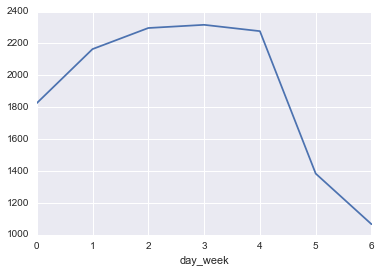

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
ridership_by_day.plot()

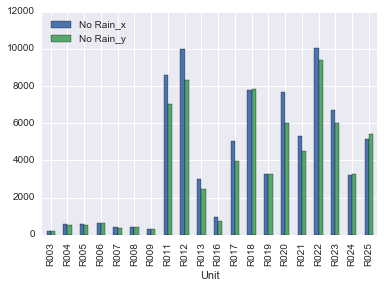

In [35]:
subway_df = pd.read_csv('nyc_subway_weather.csv')
rain = subway_df.loc[subway_df['rain']== True]
no_rain = subway_df.loc[subway_df['rain'] == False]

rain_ridership_by_day = rain.groupby('UNIT',as_index = False)['ENTRIESn_hourly'].mean()
no_rain_ridership_by_day = no_rain.groupby('UNIT', as_index = False)['ENTRIESn_hourly'].mean()

rain_ridership_df = pd.DataFrame({'Unit':rain_ridership_by_day['UNIT'][:20],'No Rain':rain_ridership_by_day['ENTRIESn_hourly'][:20]})
no_rain_ridership_df = pd.DataFrame({'Unit':no_rain_ridership_by_day['UNIT'][:20],'No Rain':no_rain_ridership_by_day['ENTRIESn_hourly'][:20]})
rain_and_no_rain_ridership_df = rain_ridership_df.merge(no_rain_ridership_df, on='Unit', how = 'outer')
rain_and_no_rain_ridership_df.plot(kind='bar',x='Unit')

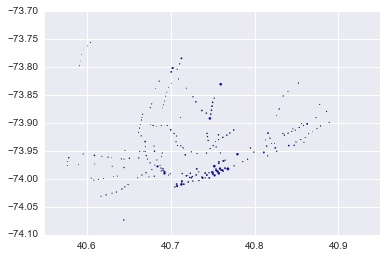

In [36]:
data_by_location = subway_df.groupby(['latitude','longitude'],as_index = False).mean()
scaled_entries = data_by_location['ENTRIESn_hourly']/data_by_location['ENTRIESn_hourly'].std()
plt.scatter(data_by_location['latitude'],data_by_location['longitude'],s=scaled_entries)

### Three-Dimensional Data

In [37]:
a = np.array([[['A1a','A1b','A1c'],['A2a','A2b','A2c']],[['B1a','B1b','B1c'],['B2a','B2b','B2c']]])

In [38]:
wp = pd.Panel(np.random.randn(2,5,4),items=['Item1','Item2'],major_axis=pd.date_range('1/1/2016',periods = 5),minor_axis = ['A','B','C','D'])
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2016-01-01 00:00:00 to 2016-01-05 00:00:00
Minor_axis axis: A to D